# Deep ViT Features - Co-segmentation
Given a set of images, segment all the common objects among them.

In [ ]:
#@title Installations and mounting
!pip install tqdm
!pip install faiss-cpu
!pip install timm
!pip install opencv-python
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git
!git clone https://github.com/ShirAmir/dino-vit-features.git
import sys
sys.path.append('dino-vit-features')
%load_ext autoreload
%autoreload 2

  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-gg1vjhgn
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-gg1vjhgn
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit 2723c7fa4f2ead16ae1ce3d8afe977724bb8f87f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
fatal: destination path 'dino-vit-features' already exists and is not an empty directory.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Change Runtime Type
To get a GPU in Google Colab, go to the top menu: Runtime ➔ Change runtime type and select GPU as Hardware accelerator.


In [ ]:
#@title Configuration:
#@markdown Choose image paths:
images_paths = ['dino-vit-features/images/cat.jpg', 'dino-vit-features/images/ibex.jpg'] #@param
#@markdown Choose loading size:
load_size = 360 #@param
#@markdown Choose layer of descriptor:
layer = 11 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=False #@param
#@markdown Choose fg / bg threshold:
thresh=0.065 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param
#@markdown Choose elbow coefficient for setting number of clusters
elbow=0.975 #@param
#@markdown Choose percentage of votes to make a cluster salient.
votes_percentage=75 #@param
#@markdown Choose whether to remove outlier images
remove_outliers=False #@param
#@markdown Choose threshold to distinguish inliers from outliers
outliers_thresh=0.7 #@param
#@markdown Choose interval for sampling descriptors for training
sample_interval=100 #@param
#@markdown Use low resolution saliency maps -- reduces RAM usage.
low_res_saliency_maps=True #@param

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 203MB/s]
Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
/content/dino-vit-features/cosegmentation.py:160: RuntimeWarning: Mean of empty slice.
  label_saliency = saliency_map[image_labels[:, 0] == label].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


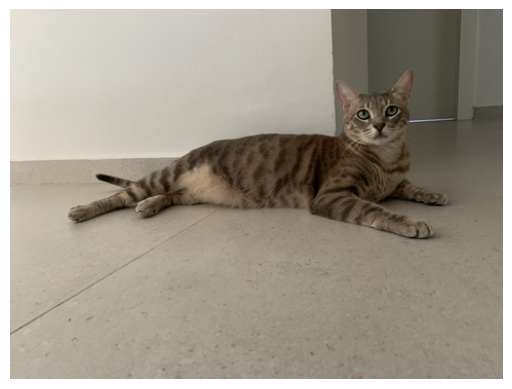

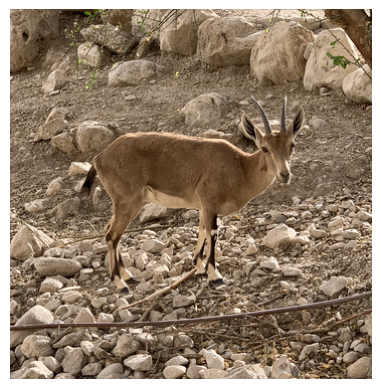

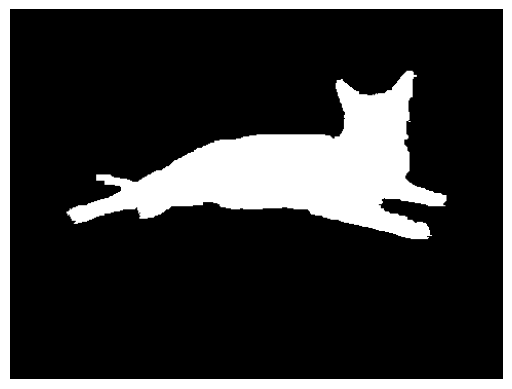

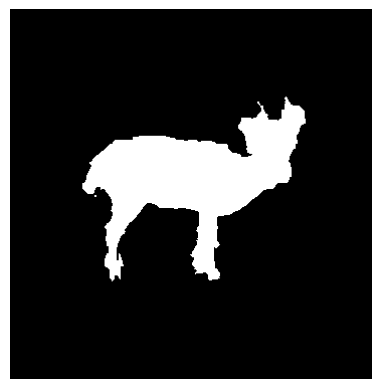

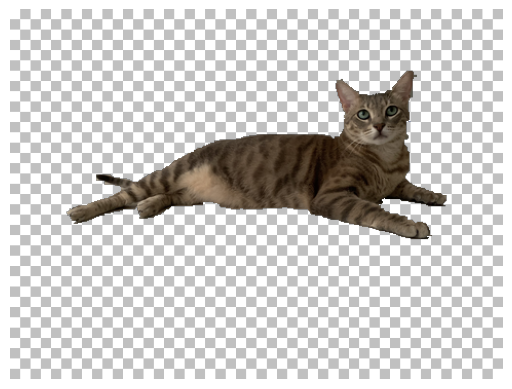

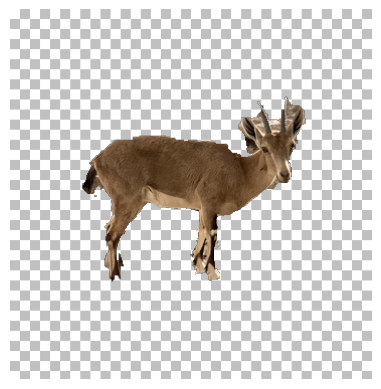

In [ ]:
import matplotlib.pyplot as plt
import torch
from cosegmentation import find_cosegmentation, draw_cosegmentation, draw_cosegmentation_binary_masks

with torch.no_grad():

     # computing cosegmentation
    seg_masks, pil_images = find_cosegmentation(images_paths, elbow, load_size, layer, facet, bin, thresh, model_type,
                                                stride, votes_percentage, sample_interval, remove_outliers,
                                                outliers_thresh, low_res_saliency_maps)

    figs, axes = [], []
    for pil_image in pil_images:
      fig, ax = plt.subplots()
      ax.axis('off')
      ax.imshow(pil_image)
      figs.append(fig)
      axes.append(ax)

    # saving cosegmentations
    binary_mask_figs = draw_cosegmentation_binary_masks(seg_masks)
    chessboard_bg_figs = draw_cosegmentation(seg_masks, pil_images)

    plt.show()